In [11]:
import os
import json
import matplotlib.pyplot as plt

In [ ]:
def move_images_to_test(data_dir, num_images=3):
    train_dir = os.path.join(data_dir, 'train')
    test_gallery_dir = os.path.join(data_dir, 'test', 'gallery')

    if not os.path.exists(test_gallery_dir):
        os.makedirs(test_gallery_dir)

    for subdir in os.listdir(train_dir):
        subdir_path = os.path.join(train_dir, subdir)
        if os.path.isdir(subdir_path):
            images = [f for f in os.listdir(subdir_path) if f.endswith(('.jpg', '.png'))]
            selected_images = images[:num_images]  # Select the first num_images

            for image in selected_images:
                src_image_path = os.path.join(subdir_path, image)
                dst_image_path = os.path.join(test_gallery_dir, image)
                if not os.path.exists(dst_image_path):  # Avoid overwriting
                    # move those images
                    os.rename(src_image_path, dst_image_path)
                    print(f'Moved {src_image_path} to {dst_image_path}')

move_images_to_test('../data', num_images=3)


In [13]:
with open('../submission.json') as f:
    submission = json.load(f)
submission

[{'filename': '15714.jpg',
  'samples': ['14490.jpg',
   '12959.jpg',
   '13212.jpg',
   '12494.jpg',
   '15232.jpg']},
 {'filename': '11604.jpg',
  'samples': ['11810.jpg',
   '15104.jpg',
   '13442.jpg',
   '14668.jpg',
   '15098.jpg']},
 {'filename': '11505.jpg',
  'samples': ['13212.jpg',
   '16858.jpg',
   '13280.jpg',
   '14477.jpg',
   '13003.jpg']},
 {'filename': '13838.jpg',
  'samples': ['11006.jpg',
   '15983.jpg',
   '12598.jpg',
   '13442.jpg',
   '15098.jpg']},
 {'filename': '16891.jpg',
  'samples': ['16858.jpg',
   '13280.jpg',
   '16868.jpg',
   '15261.jpg',
   '14477.jpg']},
 {'filename': '13283.jpg',
  'samples': ['11371.jpg',
   '12198.jpg',
   '15098.jpg',
   '12598.jpg',
   '12757.jpg']},
 {'filename': '10062.jpg',
  'samples': ['14668.jpg',
   '11810.jpg',
   '12757.jpg',
   '15098.jpg',
   '12198.jpg']},
 {'filename': '10675.jpg',
  'samples': ['12598.jpg',
   '12198.jpg',
   '11371.jpg',
   '15098.jpg',
   '12757.jpg']},
 {'filename': '15715.jpg',
  'samples': 

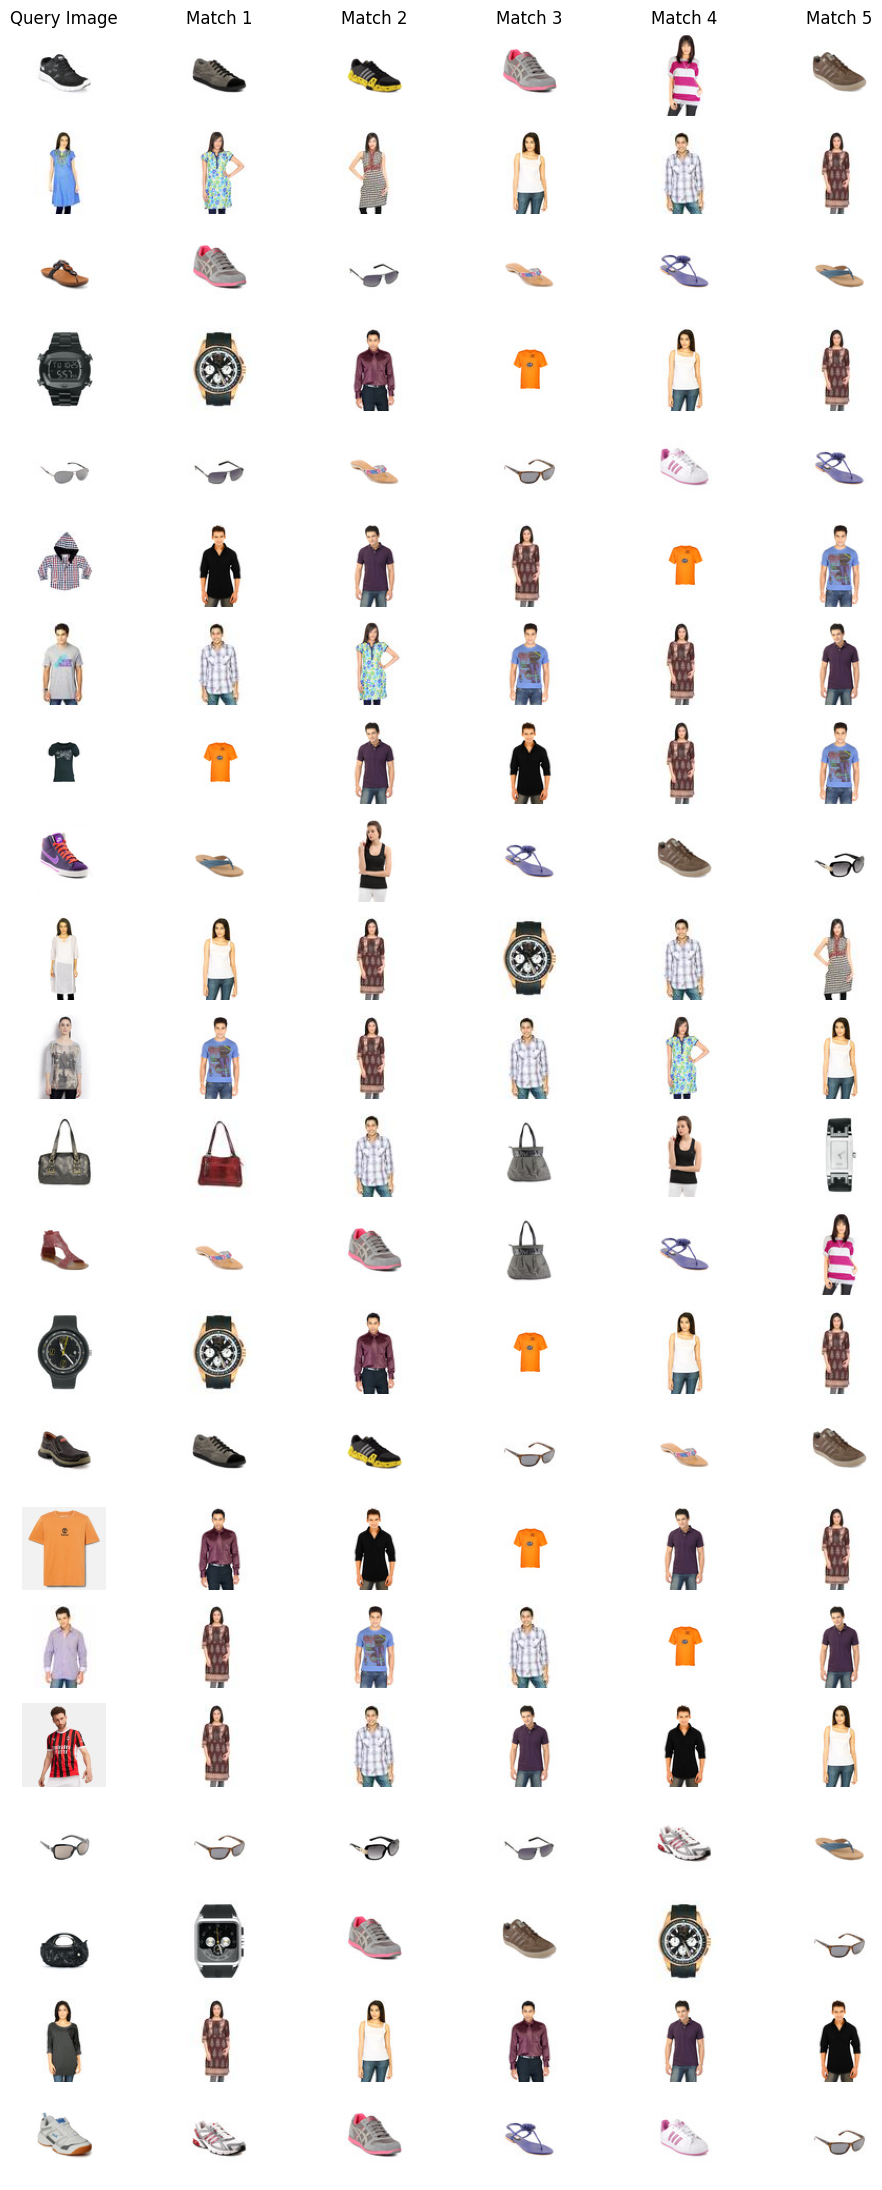

In [28]:
fig, axes = plt.subplots(len(submission), 6, figsize=(10, len(submission)))
axes[0, 0].set_title('Query Image')
for i, item in enumerate(submission):
    axes[i, 0].imshow(plt.imread(os.path.join('../data/test/query', item['filename'])))
    axes[i, 0].axis('off')
    for j, match in enumerate(item['samples']):
        axes[i, j + 1].imshow(plt.imread(os.path.join('../data/test/gallery', match)))
        axes[0, j + 1].set_title(f'Match {j + 1}')
        axes[i, j + 1].axis('off')
plt.tight_layout()
plt.show()
